In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Context

In [47]:
df = pd.read_csv('train.csv');
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [48]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
#field description

In [51]:
'''
Variables
survival (Survival 0 = No, 1 = Yes)
pclass (Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd)
sex (Sex)
Age (Age in years)
sibsp (# of siblings / spouses aboard the Titanic)
parch (# of parents / children aboard the Titanic)
ticket(Ticket number)
fare (Passenger fare)
cabin (Cabin number)
embarked(Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\nVariables\nsurvival (Survival 0 = No, 1 = Yes)\npclass (Ticket class\t1 = 1st, 2 = 2nd, 3 = 3rd)\nsex (Sex)\nAge (Age in years)\nsibsp (# of siblings / spouses aboard the Titanic)\nparch (# of parents / children aboard the Titanic)\nticket(Ticket number)\nfare (Passenger fare)\ncabin (Cabin number)\nembarked(Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton)\n'

# Data quality assessment

In [52]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [53]:
# based on the df.info() - some data is nullable.
# we can fill Age by average values

df['Age'].isnull().sum()

3292

In [56]:
age_mean = df[(df['Age'].isnull() == False)]["Age"].mean()
df['Age'] = df['Age'].fillna(age_mean)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,38.355472,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,38.355472,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,NaN,S


In [58]:
# convert string properties to numerical
Survived = df['Survived'].unique().tolist()
Pclass = df['Pclass'].unique().tolist()
Sex = df['Sex'].unique().tolist()
Embarked = df['Embarked'].unique().tolist()

print(Survived)
print(Pclass)
print(Sex)
print(Embarked)

df['Sex'].replace({'male': 0, 'female': 1},inplace=True)
df['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2},inplace=True)

[1, 0]
[1, 3, 2]
['male', 'female']
['S', 'C', 'Q', nan]


In [59]:
# dataframe for research

research_data = df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin']);
research_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.355472,2,0,27.14,2.0
1,0,3,0,38.355472,0,0,13.35,2.0
2,0,3,0,0.330000,1,2,71.29,2.0
3,0,3,0,19.000000,0,0,13.04,2.0
4,1,3,0,25.000000,0,0,7.76,2.0


# Data exploration

In [62]:
# research data

# Correlation
corr = research_data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.289723,0.507260,0.102186,-0.007587,0.023352,0.187534,-0.371518
Pclass,-0.289723,1.000000,-0.198617,-0.254843,-0.051436,-0.041848,-0.417354,0.338322
Sex,0.507260,-0.198617,1.000000,0.080341,0.030627,0.087666,0.143554,-0.329135
Age,0.102186,-0.254843,0.080341,1.000000,-0.110755,-0.123663,0.107280,-0.141231
SibSp,-0.007587,-0.051436,0.030627,-0.110755,1.000000,0.213126,0.059358,0.027441
Parch,0.023352,-0.041848,0.087666,-0.123663,0.213126,1.000000,0.061443,-0.012136
Fare,0.187534,-0.417354,0.143554,0.107280,0.059358,0.061443,1.000000,-0.239595
Embarked,-0.371518,0.338322,-0.329135,-0.141231,0.027441,-0.012136,-0.239595,1.000000


<AxesSubplot:>

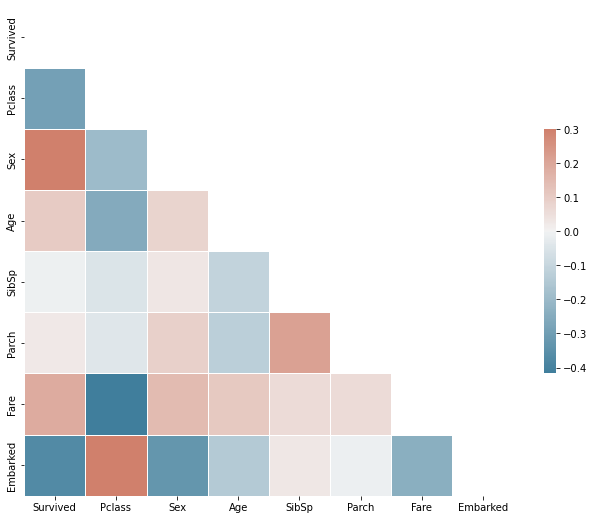

In [65]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='age_group', ylabel='counts'>

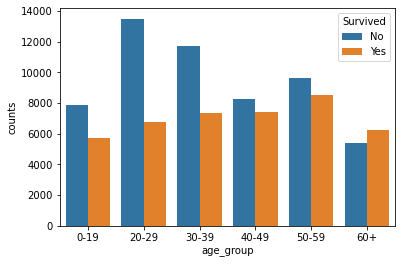

In [78]:
# Survived by age group
# 0-19
# 20-29
# 30-39
# 40-49
# 50-59
# > 60
research_data.loc[research_data['Age']<=19, 'age_group'] = '0-19'
research_data.loc[research_data['Age'].between(20,29), 'age_group'] = '20-29'
research_data.loc[research_data['Age'].between(30,39), 'age_group'] = '30-39'
research_data.loc[research_data['Age'].between(40,49), 'age_group'] = '40-49'
research_data.loc[research_data['Age'].between(50,59), 'age_group'] = '50-59'
research_data.loc[research_data['Age']>60, 'age_group'] = '60+'
survived_age_group = research_data.groupby(['age_group', 'Survived']).size().reset_index(name='counts').sort_values(["age_group"], ascending = (True))
survived_age_group['Survived'].replace({0:'No',1:'Yes'},inplace=True)
sns.barplot(x="age_group", y="counts", hue="Survived", data=survived_age_group)

<AxesSubplot:xlabel='age_group', ylabel='counts'>

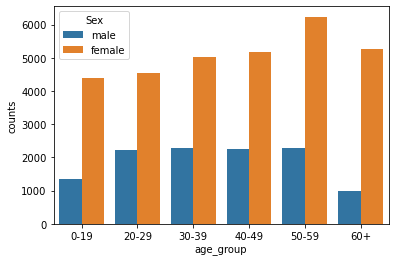

In [89]:
# Survived by age group and sex
# 0-19
# 20-29
# 30-39
# 40-49
# 50-59
# > 60
research_data.loc[research_data['Age']<=19, 'age_group'] = '0-19'
research_data.loc[research_data['Age'].between(20,29), 'age_group'] = '20-29'
research_data.loc[research_data['Age'].between(30,39), 'age_group'] = '30-39'
research_data.loc[research_data['Age'].between(40,49), 'age_group'] = '40-49'
research_data.loc[research_data['Age'].between(50,59), 'age_group'] = '50-59'
research_data.loc[research_data['Age']>60, 'age_group'] = '60+'
survived_sex_age_group = research_data[(research_data['Survived'] == 1)].groupby(['age_group', 'Sex']).size().reset_index(name='counts').sort_values(["age_group", "Sex"], ascending = (True, True))
survived_sex_age_group['Sex'].replace({0:'male', 1: 'female'},inplace=True)
#survived_sex_age_group
sns.barplot(x="age_group", y="counts", hue="Sex", data=survived_sex_age_group)

# Summary

# Перед тем, как производить анализ данных, необходимо проанализировать структуру входных данных и сами данные на их надежность использования, а так же провести обработку этих данных
